# Atomic Mass Evaluation (2016)

In this brief notebook, we use the processed AME data to explore and visualize some attributes. Let us start by importing the necessary packages.

**NOTE: This notebook is not meant to be a complete exploration resource. You are responsible for exploring and validating the data.**

In [1]:
# # PROTOTYPE
# import sys
# sys.path.append("../..")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.set_option('display.max_columns', 500)

import nucml.datasets as nuc_data

In [3]:
# This is were our figures will be stored
fig_dir = "Figures/"

## Loading Merged AME Files with Natural Data AND with and without NaNs

In [4]:
ame = nuc_data.load_ame()
ame_filled = nuc_data.load_ame(natural=True, imputed_nan=True)

INFO:root:AME: Reading and loading Atomic Mass Evaluation files from: 
 C:/Users/Pedro/Desktop/ML_Nuclear_Data/AME/CSV_Files\AME_all_merged.csv
INFO:root:AME: Reading and loading Atomic Mass Evaluation files from: 
 C:/Users/Pedro/Desktop/ML_Nuclear_Data/AME/CSV_Files\AME_Natural_Properties_no_NaN.csv


In [5]:
ame.shape

(3436, 65)

In [6]:
# How many rows with missing values exists?
rows_w_missing = ame[ame.isnull().any(axis=1)].shape[0]
print("{:.2f}% of the rows have missing values.".format(100 * (rows_w_missing/ame.shape[0])))

46.16% of the rows have missing values.


We can get some quick statistics for each numerical feature of the AME dataset. The `count` value shows approximatedly how many missing values are per feature.

In [16]:
# What is the minimum/maximum of the features in ame
ame.describe()

N            Z            A    Mass_Excess  dMass_Excess  \
count  3436.000000  3436.000000  3436.000000    3436.000000   3436.000000   
mean     82.034051    57.857392   139.891444  -24144.120957    123.588536   
std      43.293558    27.809406    70.599410   56200.705700    197.547987   
min       0.000000     0.000000     1.000000  -91652.853000      0.000000   
25%      47.000000    36.000000    84.000000  -65400.443000      3.005750   
50%      81.000000    58.000000   139.000000  -39335.024000     14.474000   
75%     114.000000    80.000000   194.000000    1172.301000    196.000000   
max     177.000000   118.000000   295.000000  201512.000000   2003.000000   

       Binding_Energy  dBinding_Energy  B_Decay_Energy  dB_Decay_Energy  \
count     3436.000000      3436.000000     3141.000000      3141.000000   
mean      7959.806728         1.838921     -100.991337       155.851106   
std        738.982115        15.031735     8063.858254       239.079983   
min      -2267.000000         0.000000   -28945.000000         0.000000   
25%       7730.734250         0.024000    -5356.454000         6.406000   
50%       8073.000000         0.094000     -858.530000        27.916000   
75%       8367.375000         1.000000     4700.000000       236.000000   
max       8794.553000       667.000000    31687.000000      2003.000000   

       Atomic_Mass_Micro  dAtomic_Mass_Micro         S(2n)       dS(2n)  \
count       3.436000e+03         3436.000000   3199.000000  3199.000000   
mean        1.398655e+08          132.654412  15464.510253   156.349187   
std         7.063095e+07          212.043923   6550.042919   242.338186   
min         1.007825e+06            0.000000  -3120.000000     0.000000   
25%         8.392781e+07            3.226500  11068.100000     5.400000   
50%         1.389127e+08           15.537500  14614.250000    23.320000   
75%         1.939668e+08          211.000000  19082.195000   228.000000   
max         2.952163e+08         2150.000000  40541.000000  2003.000000   

              S(2p)       dS(2p)          Q(a)        dQ(a)        Q(2B-)  \
count   3081.000000  3081.000000   3298.000000  3298.000000   2848.000000   
mean   13711.908945   153.876813  -1028.352902   141.749175   -158.406791   
std    10078.915472   235.628998   6989.405614   233.060316  14319.652534   
min    -7630.000000     0.000000 -25474.730000     0.000000 -37359.770000   
25%     5819.440000     6.550000  -6262.357500     3.782500  -9937.682500   
50%    11755.380000    26.170000   -430.320000    18.690000  -1685.250000   
75%    19423.390000   229.590000   4561.017500   200.000000   8501.250000   
max    55187.000000  2014.000000  11920.000000  2042.000000  52098.000000   

           dQ(2B-)         Q(ep)       dQ(ep)        Q(B-n)      dQ(B-n)  \
count  2848.000000   2964.000000  2964.000000   3023.000000  3023.000000   
mean    148.478968  -6755.747156   150.761589  -7807.666279   151.842233   
std     217.688173  12278.480250   225.980065  10536.785128   229.821244   
min       0.000000 -52959.000000     0.000000 -39622.000000     0.000000   
25%       8.100000 -14125.250000     7.277500 -14561.930000     7.100000   
50%      28.090000  -4924.250000    28.120000  -8243.100000    27.950000   
75%     263.052500   1947.500000   251.000000  -1284.525000   235.500000   
max    2003.000000  28352.000000  2003.000000  31755.000000  2003.000000   

               S(n)        dS(n)          S(p)        dS(p)        Q(4B-)  \
count   3318.000000  3318.000000   3258.000000  3258.000000   2284.000000   
mean    7755.557459   164.216263   6869.773398   160.008898   -324.475306   
std     3631.746683   254.377651   5444.802214   250.538488  23373.457604   
min    -2488.000000     0.000000  -4527.000000     0.000000 -59615.000000   
25%     5414.787500     5.140000   2772.250000     5.842500 -17485.152500   
50%     7249.960000    25.005000   5799.335000    24.815000  -2903.405000   
75%     9654.657500   269.057500   9949.867500   232.

## Visualizing some Features 

In [19]:
sns.set(style="white", font_scale=2)

### Binding Energy per Nucleon

We can easily plot the binding energy per nucleon using `seaborn`:

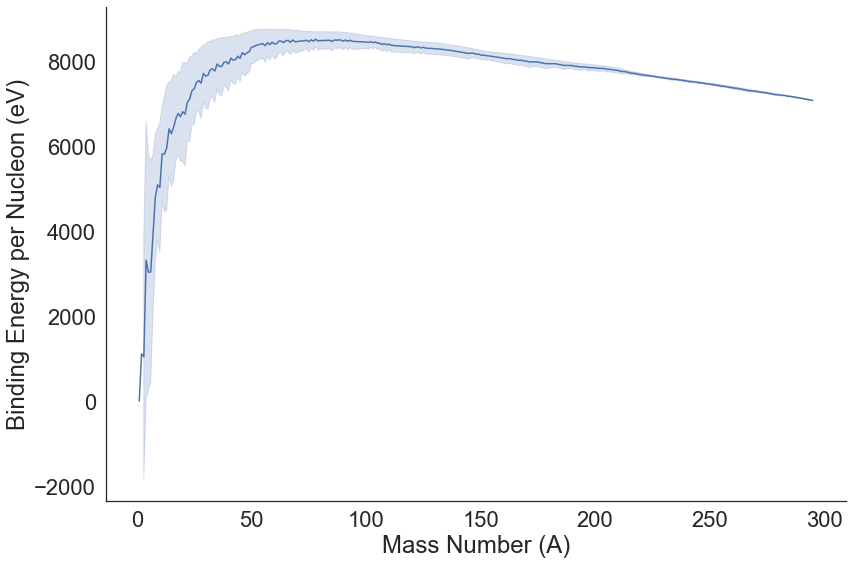

In [20]:
sns.relplot(x="A", y="Binding_Energy", kind="line", data=ame, height=8, aspect=1.5, ci="sd")
plt.xlabel("Mass Number (A)")
plt.ylabel("Binding Energy per Nucleon (eV)")
plt.savefig(os.path.join(fig_dir, "AME_BE_per_A.png"), bbox_inches='tight', dpi=500) 

### Packing Fraction

In [23]:
ame["packing_fraction"] = ((ame.Atomic_Mass_Micro/1E6) - ame.A) / ame.A

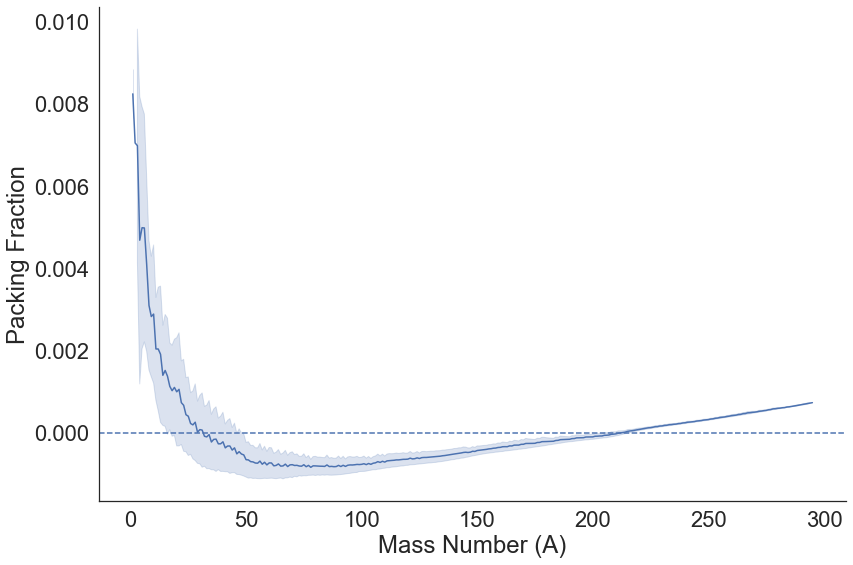

In [24]:
g = sns.relplot(x="A", y="packing_fraction", kind="line", data=ame, height=8, aspect=1.5, ci="sd")
plt.xlabel("Mass Number (A)")
plt.ylabel("Packing Fraction")
g.axes[0][0].axhline(0, ls='--')
plt.savefig(os.path.join(fig_dir, "AME_packing_fraction.png"), bbox_inches='tight', dpi=500) 

### Proton-Neutron Behaviour

<Figure size 1008x720 with 0 Axes>

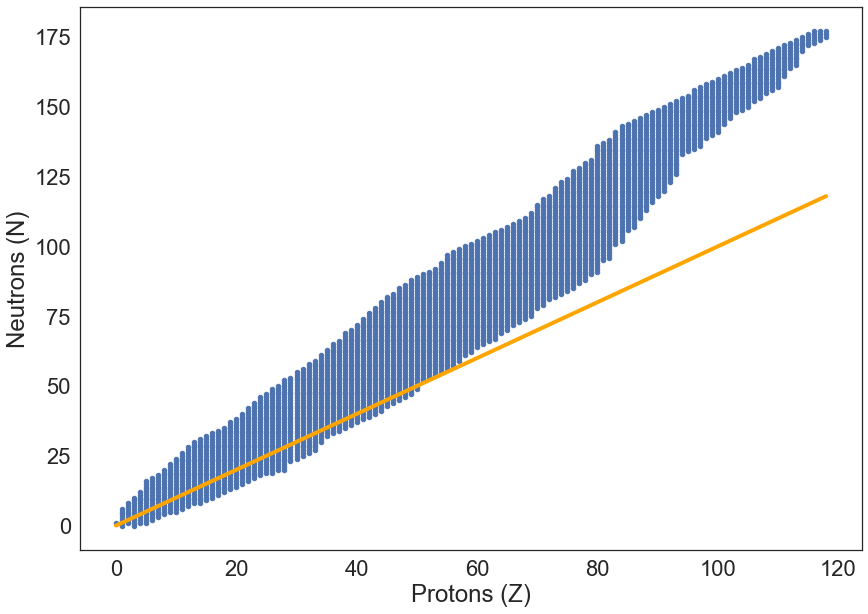

In [25]:
plt.figure(figsize=(14,10))
ame.plot(x="Z", y="N", kind='scatter', figsize=(14,10))
plt.plot(ame.Z, ame.Z, linewidth=4, color="orange")
plt.xlabel("Protons (Z)")
plt.ylabel("Neutrons (N)")
plt.savefig(os.path.join(fig_dir, "AME_Z_vs_N.png"), bbox_inches='tight', dpi=500) 

## Original vs Imputed AME Dataset

As mentioned in the loading data section of the documentation, the values for the imputed version of the AME dataset were obtained by linear interpolation. We can visualize the imputed values by overlapping both the AME dataset with and without NaN values. For example, let us visualize the Mass Excess value for natural uranium (remember that we needed natural data for EXFOR's natural target samples):

Text(0.5, 0, 'Atomic Mass Number')

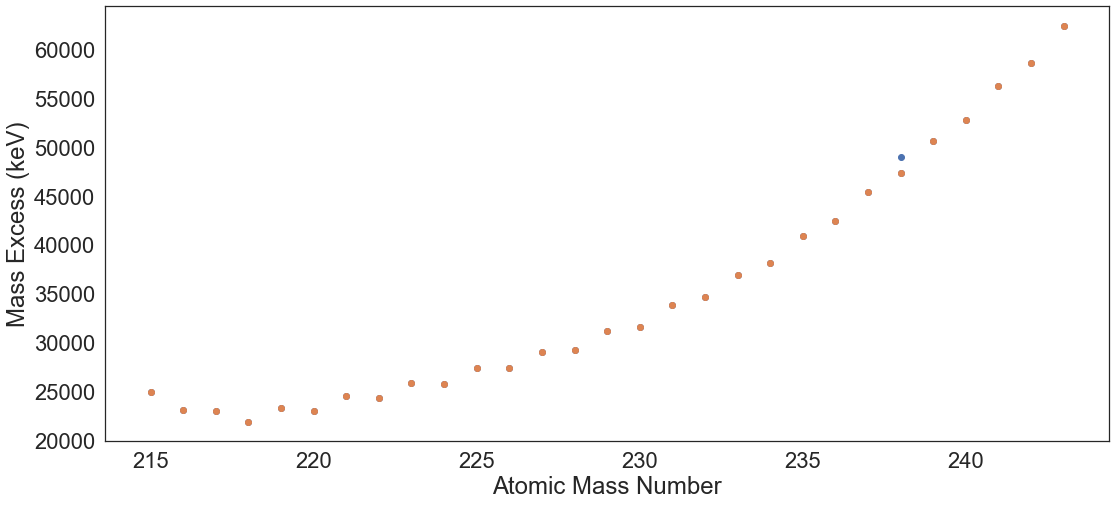

In [27]:
plt.figure(figsize=(18,8))

plt.scatter(ame_filled[ame_filled.Z == 92].sort_values(by="A").A, 
            ame_filled[ame_filled.Z == 92].sort_values(by="A").Mass_Excess)
plt.scatter(ame[ame.Z == 92].sort_values(by="A").A, 
            ame[ame.Z == 92].sort_values(by="A").Mass_Excess)
plt.ylabel("Mass Excess (keV)")
plt.xlabel("Atomic Mass Number")

We can automate the creation of these plots:

In [28]:
def plot_comparison(protons, feature, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.scatter(ame_filled[ame_filled.Z == protons].sort_values(by="A").A, 
             ame_filled[ame_filled.Z == protons].sort_values(by="A")[feature])
    ax.scatter(ame[ame.Z == protons].sort_values(by="A").A, 
             ame[ame.Z == protons].sort_values(by="A")[feature])
    ax.set_ylabel(feature.replace("_" ," "))
#     ax.set_xlabel("Atomic Mass Number")

In the following plots, the blue points represent the imputed values either for a natural data point or an isotope for which a value was not reported. In some cases, these values are not applicable but imputation is necessary for compatibility with some ML models. Let us plot the Mass Excess, Binding Energy, Beta Decay Energy, and the Neutron Separation Energy, all in a subplot

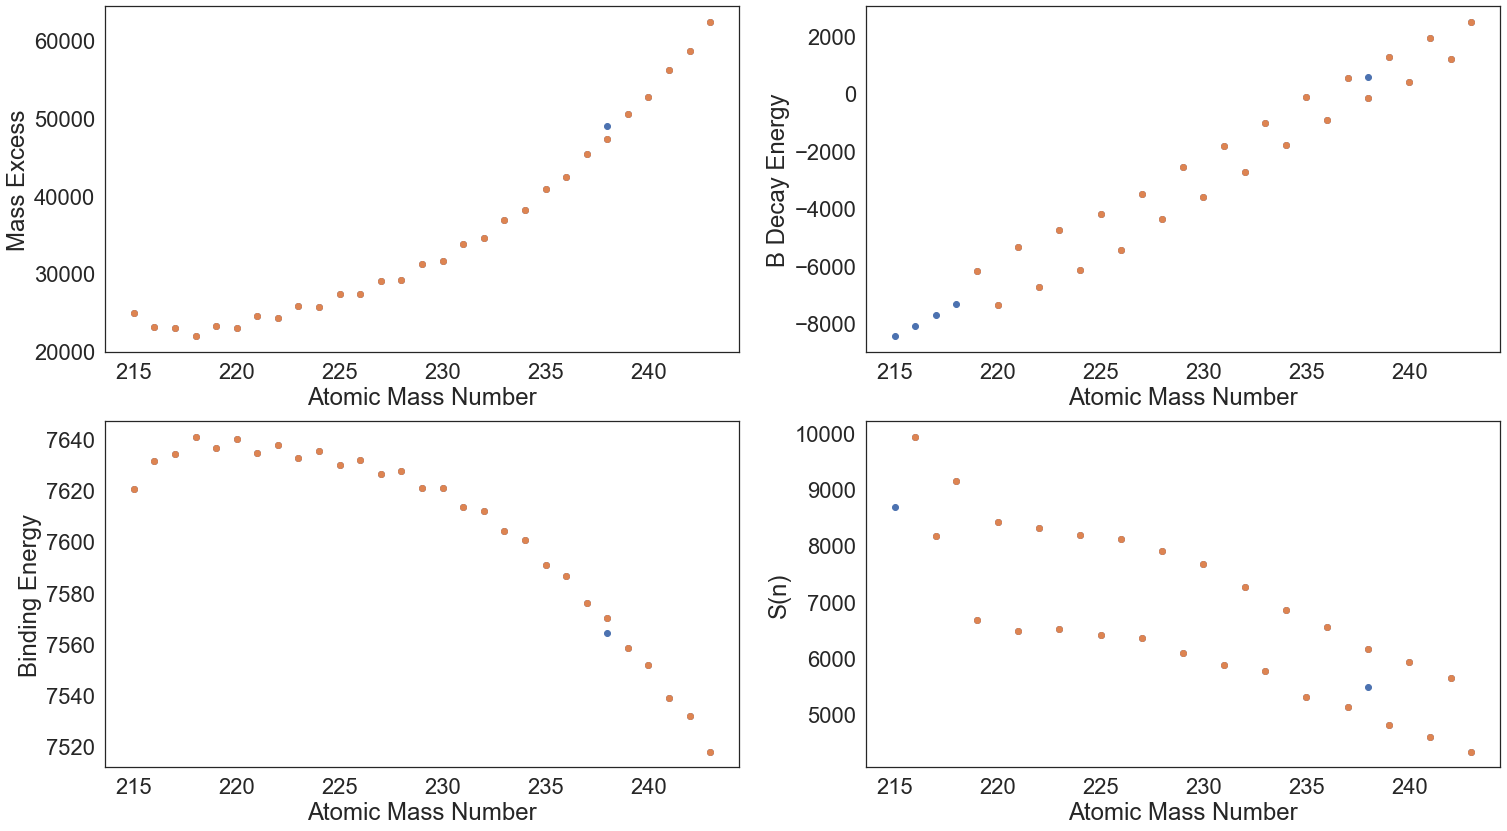

In [29]:
# make figure with subplots
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=False, figsize=(25,14))
plot_comparison(92, "Mass_Excess", ax1)
plot_comparison(92, "B_Decay_Energy", ax2)
plot_comparison(92, "Binding_Energy", ax3)
plot_comparison(92, "S(n)", ax4)

ax1.set_xlabel("Atomic Mass Number")
ax2.set_xlabel("Atomic Mass Number")
ax3.set_xlabel("Atomic Mass Number")
ax4.set_xlabel("Atomic Mass Number")

f.savefig(os.path.join(fig_dir, "AME_NaN.png"), bbox_inches='tight', dpi=500) 

While not perfect, it is better than not using the AME database at all. The AME database contains very useful information that a model can leverage to make better predictions.